In [1]:
import csv
import json
import requests
import pprint

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.cluster import KMeans

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
data = pd.read_csv('sortby_MAC_Time_Plus Loc.csv')

D:\D\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (2,9,11,12,13,14,16,17,18,19,20,21,22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#d = data[['AP.2', 'Client.6', 'Association Time.6', 'Disassociation Time.6', 'Client.4'] ]

data['Client.6'][1:] = pd.to_numeric(data['Client.6'][1:])


#data[['AP.2', 'Client.6', 'Association Time.6', 'Disassociation Time.6', 'Client.4'] ]

## 건물이름만
#data['Location'] = data.apply(lambda x:  x['AP.2'] if len(x['AP.2'].split('>'))<2 else x['AP.2'].split('>')[1]  ,axis=1)
data[['AP.2', 'Client.6', 'Association Time.6', 'Disassociation Time.6', 'Client.4'] ].head()

D:\D\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,AP.2,Client.6,Association Time.6,Disassociation Time.6,Client.4
0,Map Location,MAC Address,NaN,NaN,Endpoint Type
1,Pusan > Inmoon (306) > Inmoon 1F,0,2019-05-19 00:34:43,2019-05-19 00:49:46,Android-LG
2,PUSAN-OUTDOOR > PUSAN-OUTDOOR,0,2019-05-19 00:49:46,2019-05-19 01:24:52,Android-LG
3,Pusan > NewJunsan (515) > NewJunsan 1F,0,2019-05-19 01:29:55,2019-05-19 02:05:03,Android-LG
4,Pusan > Inmoon (306) > Inmoon 3F,0,2019-05-19 02:55:22,2019-05-19 03:05:25,Android-LG


In [30]:
num = 0
cnt = 0
idx = 0
l = []
prev = 0
sum = 0
for i in data['Client.6'][1:] :
    if num != i:
        if idx-prev >= 4000:
            l.append(num)
            print(idx-prev)
            sum = sum+ (idx-prev)
            cnt = cnt+1
        prev = idx
        num = i
    idx = idx+1

print(cnt)
print(sum)
#c = data[data['Client.6']== 23220 ]
#c[ ['AP.2', 'Client.6', 'Association Time.6', 'Disassociation Time.6', 'Client.4'] ]

4768
4015
4152
4419
4781
4915
5009
5014
4445
5060
4585
4199
5000
4455
4577
6890
4211
4341
4374
7878
4111
4216
4008
7452
4052
4268
4292
4113
7742
4212
5008
4529
4421
4063
4054
4479
4493
7813
4702
4410
4027
41
197553


In [4]:
len(d)

9775563

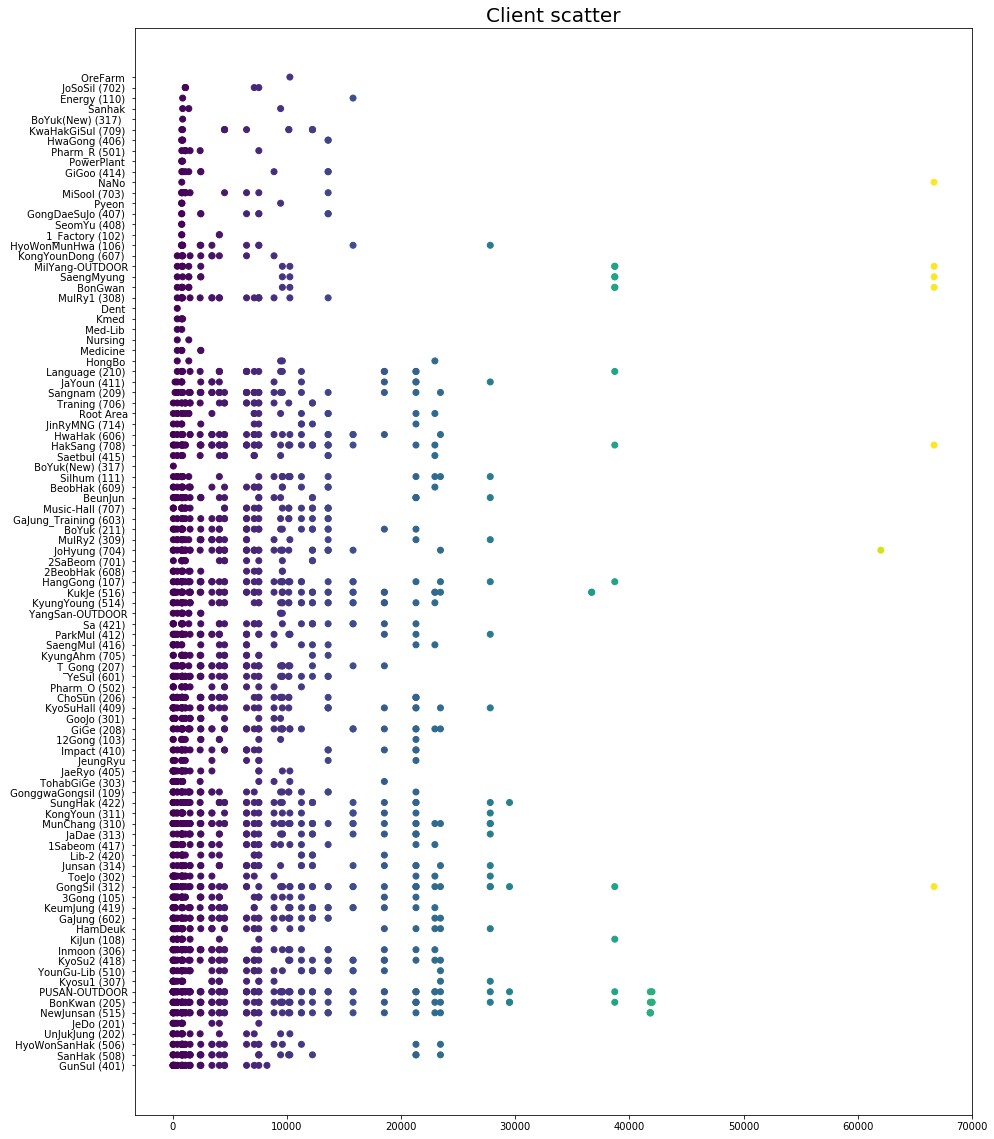

In [43]:
#ret = pd.DataFrame()

for i in l:
    ret2 = data[data['Client.6']== i ] 
    ret = pd.concat([ret, ret2])
 
s = ret[ ['Location', 'Client.6', 'Client.4'] ].drop_duplicates()

#c[ ['AP.2', 'Client.6', 'Association Time.6', 'Disassociation Time.6', 'Client.4'] ]

plt.figure(figsize=(15, 20))
plt.scatter(s['Client.6'], s['Location'], c=s['Client.6'], label=l)
plt.title('Client scatter', size=20)
plt.show()
#g1.set_axis_labels("RSSI", "EndPoint Type")


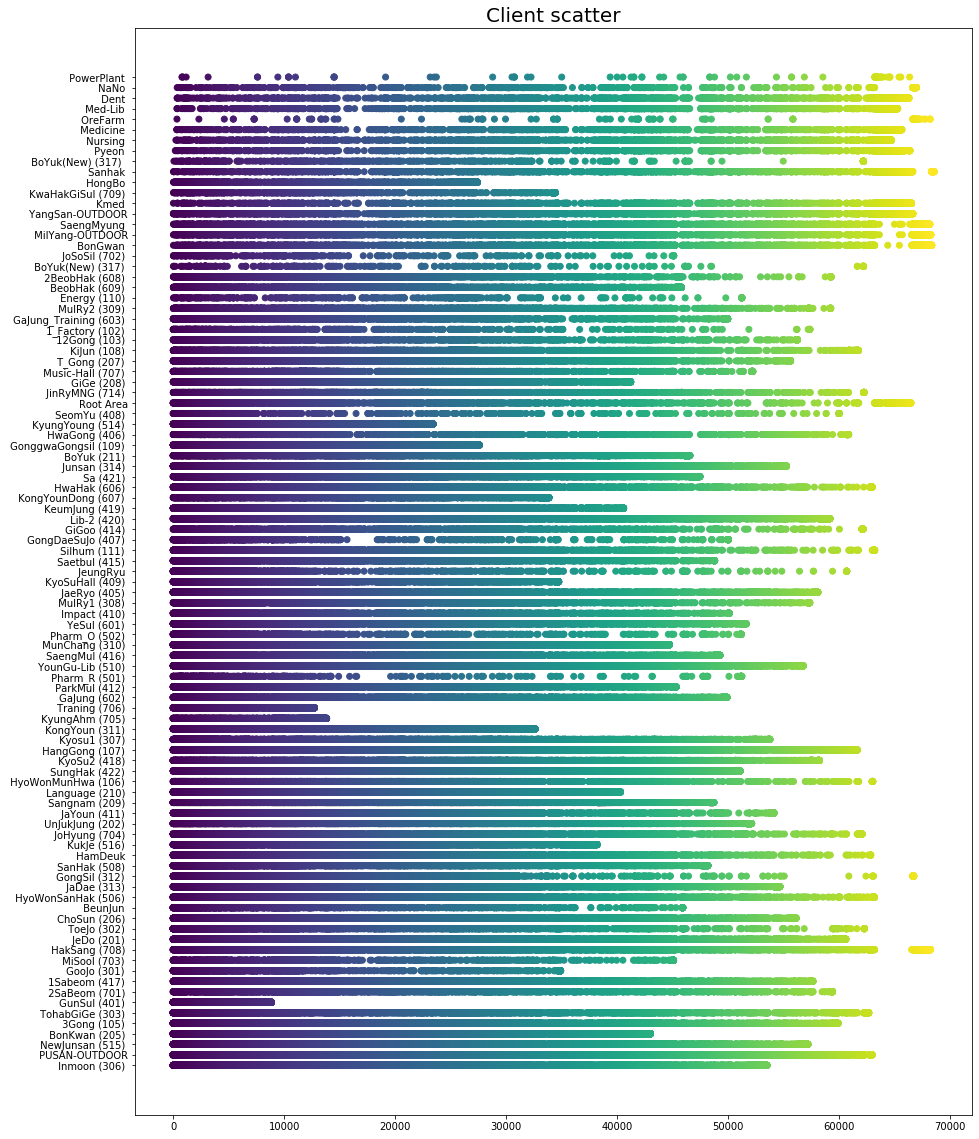

In [4]:
s = data[ ['Location', 'Client.6', 'Client.4'] ][1:].drop_duplicates()

plt.figure(figsize=(15, 20))
plt.scatter(s['Client.6'], s['Location'],c=s['Client.6'])
plt.title('Client scatter', size=20)
plt.show()

In [5]:
l = []
s['Client.6'] = pd.to_numeric(s['Client.6'])

for i in range(0, 68544):
    l.append(s[s['Client.6']==i]['Location'].values.tolist())

In [6]:
#sss = ss.values.tolist()
#len(sss)

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

te = TransactionEncoder()
te_ary = te.fit(l).transform(l)
df = pd.DataFrame(te_ary, columns=te.columns_)
df


,12Gong (103),1Sabeom (417),1_Factory (102),2BeobHak (608),2SaBeom (701),3Gong (105),BeobHak (609),BeunJun,BoYuk (211),BoYuk(New) (317),BoYuk(New) (317),BonGwan,BonKwan (205),ChoSun (206),Dent,Energy (110),GaJung (602),GaJung_Training (603),GiGe (208),GiGoo (414),GongDaeSuJo (407),GongSil (312),GonggwaGongsil (109),GooJo (301),GunSul (401),HakSang (708),HamDeuk,HangGong (107),HongBo,HwaGong (406),HwaHak (606),HyoWonMunHwa (106),HyoWonSanHak (506),Impact (410),Inmoon (306),JaDae (313),JaYoun (411),JaeRyo (405),JeDo (201),JeungRyu,JinRyMNG (714),JoHyung (704),JoSoSil (702),Junsan (314),KeumJung (419),KiJun (108),Kmed,KongYoun (311),KongYounDong (607),KukJe (516),KwaHakGiSul (709),KyoSu2 (418),KyoSuHall (409),Kyosu1 (307),KyungAhm (705),KyungYoung (514),Language (210),Lib-2 (420),Med-Lib,Medicine,MiSool (703),MilYang-OUTDOOR,MulRy1 (308),MulRy2 (309),MunChang (310),Music-Hall (707),NaNo,NewJunsan (515),Nursing,OreFarm,PUSAN-OUTDOOR,ParkMul (412),Pharm_O (502),Pharm_R (501),PowerPlant,Pyeon,Sa (421),SaengMul (416),SaengMyung,Saetbul (415),SanHak (508),Sangnam (209),Sanhak,SeomYu (408),Silhum (111),SungHak (422),T_Gong (207),ToeJo (302),TohabGiGe (303),Traning (706),UnJukJung (202),YangSan-OUTDOOR,YeSul (601),YounGu-Lib (510),Root Area
0,False,True,False,False,True,True,False,True,False,False,False,False,True,True,False,False,True,False,False,False,False,True,False,True,True,True,True,True,False,False,False,True,True,False,True,True,True,False,True,False,False,True,False,False,False,False,False,True,False,True,False,True,False,True,True,False,True,False,False,False,True,False,False,False,True,False,False,True,False,False,True,True,False,True,False,False,False,True,False,False,True,True,False,False,False,True,False,True,True,True,True,False,False,True,False
1,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,False,False,True,False,True,False,True,False,False,False,False,False,True,False,False,False,True,True,True,True,False,True,False,False,False,True,False,True,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True,False,False,True,True,False,False,False,False,False,True,True,True,True,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,True,True,True,True,False,False,True,False,True,False,True,False,False,False,False,False,False,False,False,True,True,False,False,True,True,True,False,True,True,True,True,False,True,True,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,True,True,False,False,True,False,False,True,True,True,False,False,False,True,False
3,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False
4,False,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,True,False,False,True,False,True,True,False,True,True,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,False,False,False,False,False,False
5,False,False,False,False,Fals

In [7]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets = frequent_itemsets.sort_values(by='support', ascending=False)

In [8]:

frequent_itemsets

,support,itemsets
23,0.601001,( PUSAN-OUTDOOR)
22,0.272759,( NewJunsan (515) )
16,0.270016,( KukJe (516) )
21,0.266150,( MunChang (310) )
106,0.251897,"( PUSAN-OUTDOOR, NewJunsan (515) )"
12,0.249431,( Inmoon (306) )
103,0.247724,"( PUSAN-OUTDOOR, MunChang (310) )"
86,0.238358,"( PUSAN-OUTDOOR, KukJe (516) )"
3,0.235571,( BonKwan (205) )
11,0.233485,( HangGong (107) )


AttributeError: 'Line2D' object has no property 'method'

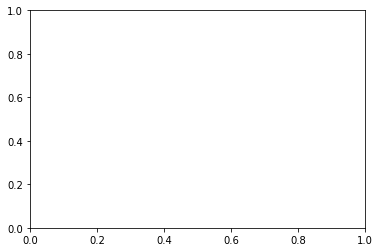

In [12]:
plt.plot(frequent_itemsets, method='graph')

In [36]:
data.to_csv('sortby_MAC_Time_Plus Loc.csv')